<a href="https://colab.research.google.com/github/Nehaasati/DSA_1/blob/master/Copy_of_Into_The_Future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import basic libraries that will be used.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fbprophet import Prophet



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Import data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
## load CSV files in dataframe and check for data in file.
train=pd.read_csv('/content/drive/My Drive/train.csv')
train.head(10)

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381
5,5,2019-03-19 00:00:50,723.715893,47810.517411
6,6,2019-03-19 00:01:00,720.406875,47835.758121
7,7,2019-03-19 00:01:10,712.682269,47806.938481
8,8,2019-03-19 00:01:20,711.509741,47812.099044
9,9,2019-03-19 00:01:30,707.025594,47821.540514


In [ ]:
## load CSV files in dataframe and check for data in file.
test=pd.read_csv('/content/drive/My Drive/test(1).csv')
test.head(10)
print(len(test))

375


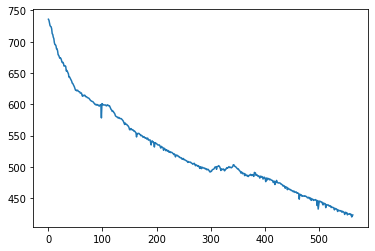

In [ ]:
##  Plot feature_1 to check for value range and distribution
plt.plot(train['feature_1'])

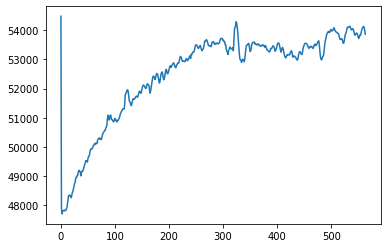

In [ ]:
##  Plot feature_2 to check for value range and distribution
plt.plot(train['feature_2'])

In [ ]:
## Store required driving feature in local variable
X = train.feature_1

In [ ]:
## Store required target feature in local variable
Y=train.feature_2

In [ ]:
## Check for Ordinary Least Squares regression  between F_1 and F_2 without adding any time as input.
## https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
results = sm.OLS(Y, X).fit()


In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              feature_2   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          2.101e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        18:12:00   Log-Likelihood:                         -5902.1
No. Observations:                 564   AIC:                                  1.181e+04
Df Residuals:                     563   BIC:                                  1.181e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## change time stamp colum as time datatype, so that time series model can be used.
train['time'] = pd.to_datetime(train['time'])
train.drop('id',axis=1,inplace=True)
train.set_index('time',inplace=True)

In [ ]:
## reset index for test data and check for last rows in data
data = train.reset_index()
data.tail()

,time,feature_1,feature_2
559,2019-03-19 01:33:10,423.726707,54115.388787
560,2019-03-19 01:33:20,424.278568,54127.830664
561,2019-03-19 01:33:30,420.127639,54092.561194
562,2019-03-19 01:33:40,421.291993,53994.714950
563,2019-03-19 01:33:50,423.257581,53863.615475


In [ ]:
## Create a DF which has direct relation between time and target value
data2 = data[['time','feature_2']].reset_index()
data2.drop('index',axis=1,inplace=True)
data2.columns = ['ds', 'y']

In [ ]:
## Split train data in 2 parts, 1 to train model and 2nd to check for performance of model
prediction_size = 50
train_df2 = data2[:-prediction_size]
train_df2.tail()

,ds,y
509,2019-03-19 01:24:50,53943.845895
510,2019-03-19 01:25:00,53921.971983
511,2019-03-19 01:25:10,53921.542656
512,2019-03-19 01:25:20,53894.271784
513,2019-03-19 01:25:30,53882.826471


In [ ]:
## Use Prophet model for timseries. Based on sklearn API's and has good wrapper fucntionality.
##https://facebook.github.io/prophet/docs/quick_start.html
n = Prophet()
n.fit(train_df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
## make Timestamps for new final predict data frames.
future = n.make_future_dataframe(periods=435, freq='10S')
future.tail(n=3)

,ds
946,2019-03-19 02:37:40
947,2019-03-19 02:37:50
948,2019-03-19 02:38:00


In [ ]:
## predict values for final test data
forecast = n.predict(future)
forecast.tail(n=3)
forecast.head(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-19 00:00:00,48480.484673,48072.658990,48888.708442,48480.484673,48480.484673,0.0,0.0,0.0,0.0,0.0,0.0,48480.484673
1,2019-03-19 00:00:10,48472.380890,48056.099943,48884.716636,48472.380890,48472.380890,0.0,0.0,0.0,0.0,0.0,0.0,48472.380890
2,2019-03-19 00:00:20,48464.277106,48064.399572,48904.875866,48464.277106,48464.277106,0.0,0.0,0.0,0.0,0.0,0.0,48464.277106


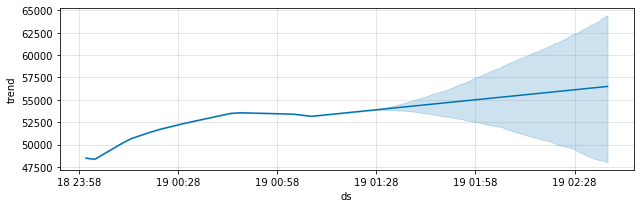

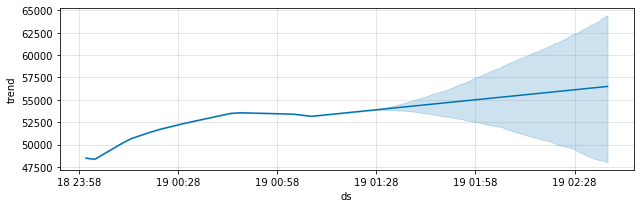

In [ ]:
## plot predicted values vs time stamp
n.plot_components(forecast)



In [ ]:
## define a function to check for MAPE and MAP errors.
def score(df, fcast):
    
    df = pd.DataFrame()
    df['error'] = data2[514:563]['y'] - fcast
    df['relative_error'] = 100*df['error']/data2[514:563]['y']
    error_mean = lambda error_name: np.mean(np.abs(df[error_name]))
    
    return {'MAPE': error_mean('relative_error'), 'MAE': error_mean('error')}



In [ ]:
## call above function and print values for errors
for err_name, err_value in score(data2, fcast).items():
    print(err_name, err_value)

MAPE 0.247956006288187
MAE 133.5301352894842


In [ ]:
## Do forecast for test data.
d = forecast[574:]['yhat']
final = pd.DataFrame()
final['id'] = test['id']
final['feature_2'] = list(d)

In [ ]:
#final output
final.head()

,id,feature_2
0,564,54174.345304
1,565,54180.548499
2,566,54186.751693
3,567,54192.954888
4,568,54199.158083
